In [3]:
print("hellow world")

hellow world


In [4]:
import numpy as np
import pandas as pd

In [5]:
match = pd.read_csv('matches.csv')
delivery = pd.read_csv('deliveries.csv')

In [6]:
total_score_df = delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

In [7]:
total_score_df = total_score_df[total_score_df['inning'] == 1]

In [8]:
match_df = match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')

In [9]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [10]:
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals'
]

In [11]:
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

In [12]:
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [13]:
match_df = match_df[match_df['dl_applied'] == 0]

In [14]:
match_df = match_df[['match_id','city','winner','total_runs']]

In [15]:
delivery_df = match_df.merge(delivery,on='match_id')

In [16]:
delivery_df = delivery_df[delivery_df['inning'] == 2]

In [18]:
# delivery_df['current_score'] = delivery_df.groupby('match_id').cumsum()['total_runs_y']

delivery_df['total_runs_y'] = pd.to_numeric(delivery_df['total_runs_y'], errors='coerce')
delivery_df['current_score'] = delivery_df.groupby('match_id')['total_runs_y'].cumsum()


In [19]:
delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']


In [20]:
delivery_df['balls_left'] = 126 - (delivery_df['over']*6 + delivery_df['ball'])

In [22]:
# delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")
# delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x == "0" else "1")
# delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')
# wickets = delivery_df.groupby('match_id').cumsum()['player_dismissed'].values
# delivery_df['wickets'] = 10 - wickets
# delivery_df.head()


# Ensure player_dismissed is numeric
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x: x if x == "0" else "1")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype(int)

# Apply cumsum only on the 'player_dismissed' column
delivery_df['wickets'] = delivery_df.groupby('match_id')['player_dismissed'].cumsum()

# To calculate wickets remaining (optional)
delivery_df['wickets_left'] = 10 - delivery_df['wickets']


In [23]:
delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])

In [24]:
delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']

In [25]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [26]:
delivery_df['result'] = delivery_df.apply(result,axis=1)

In [27]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]

In [28]:
final_df = final_df.sample(final_df.shape[0])

In [29]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
11795,Delhi Daredevils,Chennai Super Kings,Chennai,-3,5,118,169,8.973913,-3.6,1


In [30]:
final_df.dropna(inplace=True)

In [49]:
final_df = final_df[final_df['balls_left'] != 0]
final_df.to_csv("/Users/karanmundari/Desktop/Cricket_Prediction/cricket_prediction/final_data.csv")

In [50]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [53]:
final_df.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
66868,Mumbai Indians,Chennai Super Kings,Mumbai,142,92,28,173,6.642857,9.260870,1
41000,Rajasthan Royals,Chennai Super Kings,Chennai,229,106,14,246,7.285714,12.962264,0
33490,Deccan Chargers,Kolkata Knight Riders,Mumbai,98,83,40,161,10.216216,7.084337,0
34040,Delhi Daredevils,Kings XI Punjab,Chandigarh,48,38,84,142,6.878049,7.578947,1
8119,Kolkata Knight Riders,Deccan Chargers,Kolkata,90,98,22,110,5.454545,5.510204,1


In [33]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
95206,Chennai Super Kings,Rajasthan Royals,Ranchi,22,10,115,148,6.872727,13.200000
54982,Rajasthan Royals,Chennai Super Kings,Jaipur,137,75,46,196,7.866667,10.960000
45875,Royal Challengers Bangalore,Mumbai Indians,Bangalore,117,54,67,191,6.727273,13.000000
99282,Kolkata Knight Riders,Sunrisers Hyderabad,Kolkata,109,83,40,160,8.270270,7.879518
68796,Kings XI Punjab,Deccan Chargers,Chandigarh,135,78,43,190,7.857143,10.384615
...,...,...,...,...,...,...,...,...,...
141766,Rajasthan Royals,Mumbai Indians,Mumbai,64,47,75,191,10.438356,8.170213
24748,Kolkata Knight Riders,Mumbai Indians,East London,93,65,58,148,6.000000,8.584615
112741,Kolkata Knight Riders,Rajasthan Royals,Mumbai,36,13,118,199,9.140187,16.615385
13371,Mumbai Indians,Rajasthan Royals,Mumbai,39,59,65,103,6.295082,3.966102


In [35]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder

# trf = ColumnTransformer([
#     ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
# ]
# ,remainder='passthrough')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf', OneHotEncoder(sparse_output=False, drop='first'), ['batting_team', 'bowling_team', 'city'])
], remainder='passthrough')


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [37]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [38]:
pipe.fit(X_train,y_train)

,steps,"[('step1', ...), ('step2', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('trf', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [39]:
y_pred = pipe.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7908753241292312

In [41]:
pipe.predict_proba(X_test)[10]

array([0.64812567, 0.35187433])

In [42]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))

In [43]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target

In [44]:
temp_df,target = match_progression(delivery_df,74,pipe)
temp_df

Target- 178


,end_of_over,runs_after_over,wickets_in_over,lose,win
10459,1,4,4,62.6,37.4
10467,2,8,-8,62.5,37.5
10473,3,1,-6,74.8,25.2
10479,4,7,-6,75.5,24.5
10485,5,12,-6,68.1,31.9
10491,6,13,-6,57.9,42.1
10497,7,9,-6,55.4,44.6
10505,8,15,-8,42.7,57.3
10511,9,7,-6,44.4,55.6
10518,10,17,-7,27.9,72.1


Text(0.5, 1.0, 'Target-178')

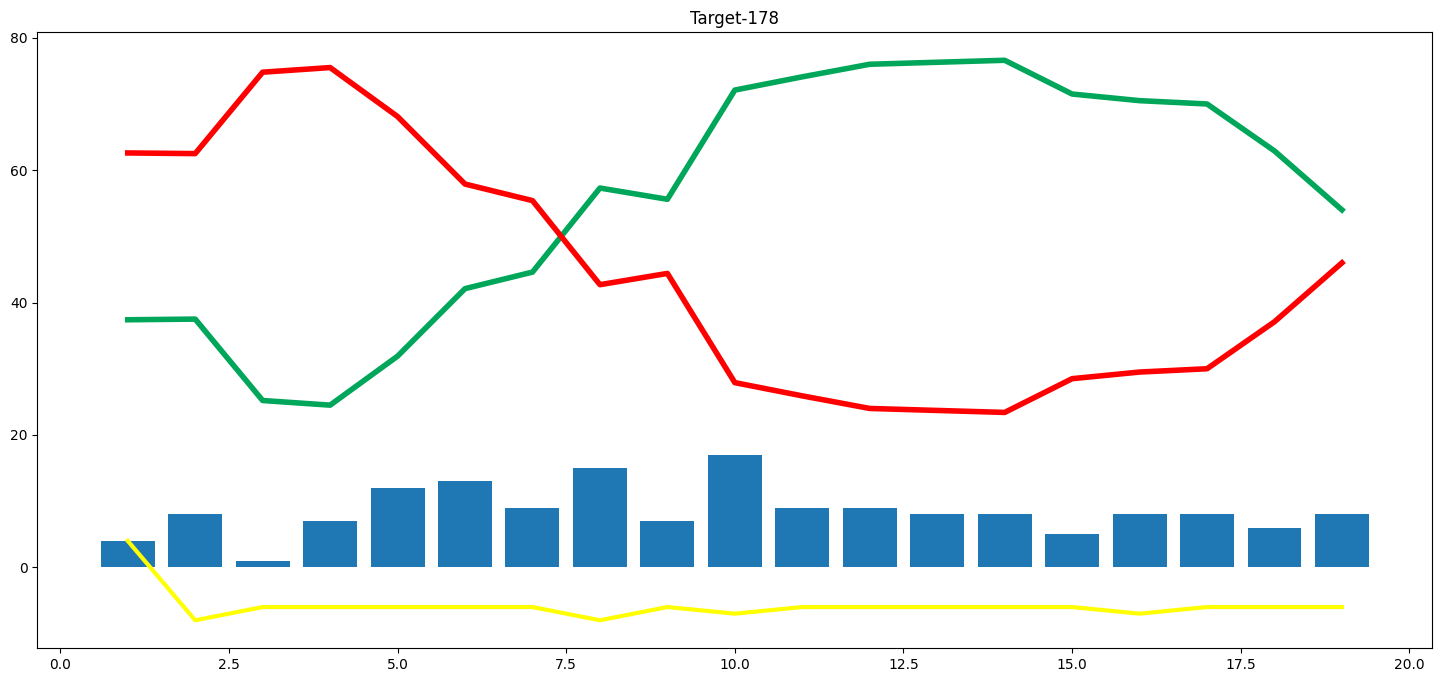

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [47]:
delivery_df['city'].unique()

array(['Hyderabad', 'Bangalore', 'Mumbai', 'Indore', 'Kolkata', 'Delhi',
       'Chandigarh', 'Jaipur', 'Chennai', 'Cape Town', 'Port Elizabeth',
       'Durban', 'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi',
       'Sharjah', nan, 'Mohali', 'Bengaluru'], dtype=object)

In [48]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))